# PROJECT 3
### Netflix Data: Cleaning, Analysis and Visualization

## Import necessary libraries

In [12]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


## Load the dataset


In [15]:
data = pd.read_csv("netflix1.csv",encoding='latin1')


## Inspect Datasets


In [16]:
print(data.head())


  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [17]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


In [18]:
print(data.describe())


       release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


## Data Cleaning


In [26]:
# Handle Missing Values
print(data.isnull().sum())

# Check column names
print(data.columns)

# Replace 'cast' with the correct column name
data.dropna(subset=['director', 'country', 'type'], inplace=True)

data['rating'].fillna('Unknown', inplace=True)

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


## Exploratory Data Analysis (EDA)

### Distribution of Movies vs. TV Shows



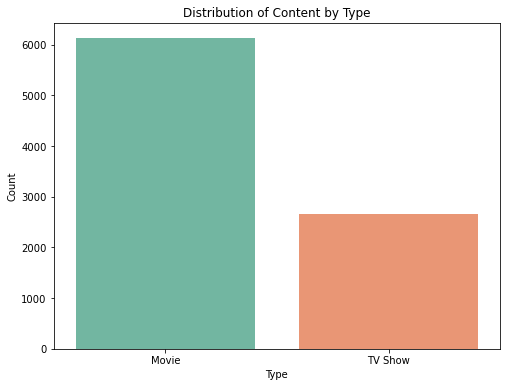

In [20]:
type_counts = data['type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


### Most Common Genres


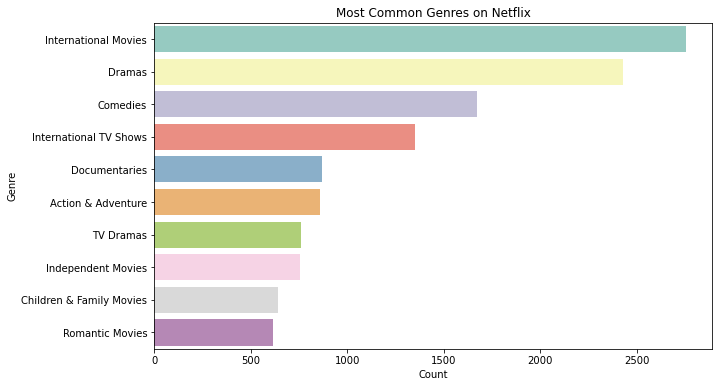

In [29]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(', '))

# Most Common Genres
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(Counter(all_genres)).nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


### Content Added Over Time

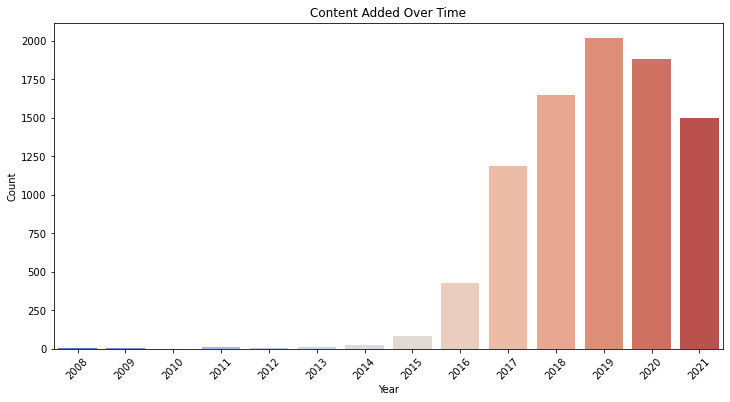

In [31]:
data['date_added'] = pd.to_datetime(data['date_added'])

# Extract the year from 'date_added'
data['year_added'] = data['date_added'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Top 10 Directors with the Most Titles


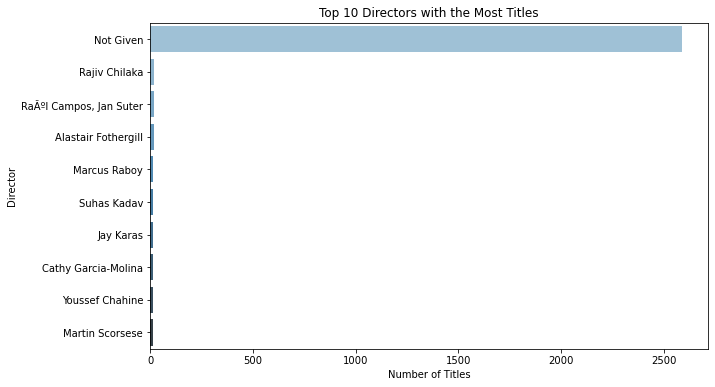

In [23]:
top_directors = data['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()



## Advanced Data Cleaning & Processing


In [47]:
# Extract Decades
data['decade'] = (data['release_year'] // 10) * 10

# Convert duration to string
data['duration'] = data['duration'].astype(str)

# Convert duration to numeric
data['duration'] = data['duration'].str.replace(' min', '').str.replace(' Season', '').str.replace(' Seasons', '')
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')


In [48]:
# Detect Outliers
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['duration'] < (Q1 - 1.5 * IQR)) | (data['duration'] > (Q3 + 1.5 * IQR))]
print(outliers[['title', 'duration']])


                                                  title  duration
151                         Headspace: Unwind Your Mind     273.0
227                         Once Upon a Time in America     229.0
890   Seven Souls in the Skull Castle: Season Moon K...     212.0
1035                                             Lagaan     224.0
2009                                 Lock Your Girls In     233.0
2017                                    Raya and Sakina     230.0
2018                                     No Longer kids     237.0
2020                             The School of Mischief     253.0
2121                       No Direction Home: Bob Dylan     208.0
2192                           Kabhi Khushi Kabhie Gham     209.0
2511                                       The Irishman     209.0
3322                                       Jodhaa Akbar     214.0
5814                                             Sangam     228.0
7822                         Black Mirror: Bandersnatch     312.0


## Data Visualization
### Heatmap of Content Releases Over Time


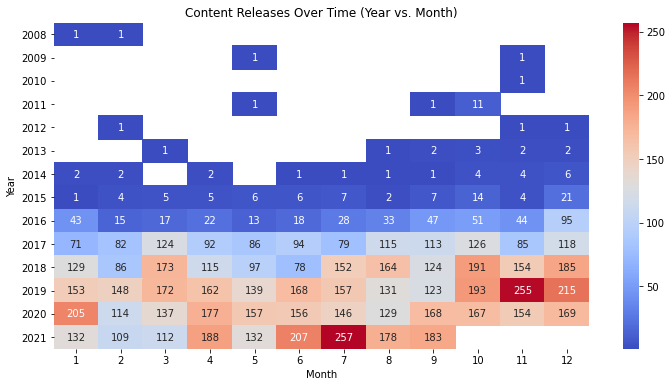

In [51]:
# Extract month from date_added
data['date_added'] = pd.to_datetime(data['date_added'])
data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year

# Create heatmap
heatmap_data = data.groupby(['year_added', 'month_added']).size().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='g')
plt.title("Content Releases Over Time (Year vs. Month)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


## Network Graph of Actor Collaborations

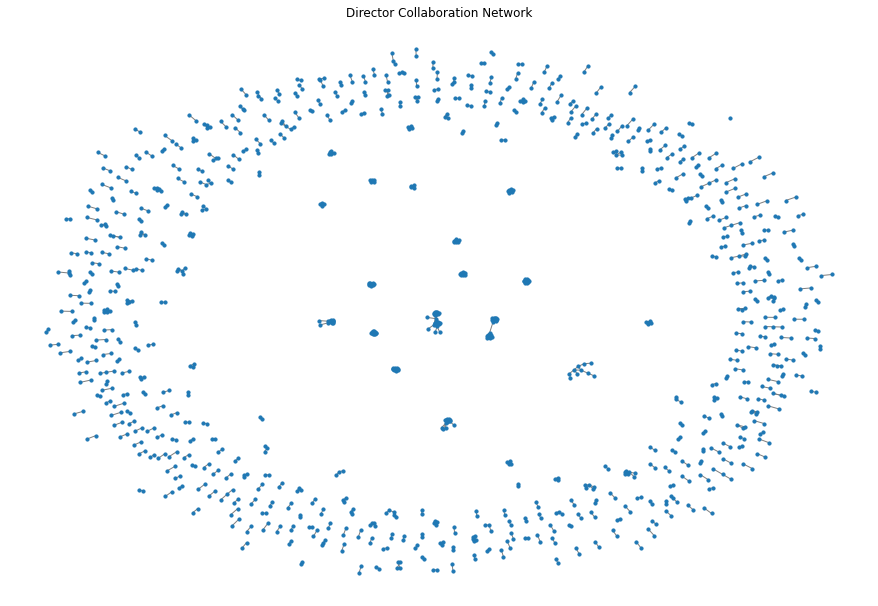

In [54]:
import networkx as nx
from itertools import combinations

# Create an actor collaboration graph
G = nx.Graph()

# Split directors into individual names
data['director'] = data['director'].fillna('').apply(lambda x: x.split(', '))

edges = [combo for director_list in data['director'] for combo in combinations(director_list, 2)]

# Add edges to the graph
G.add_edges_from(edges)

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=False, node_size=10, edge_color="gray")
plt.title("Director Collaboration Network")
plt.show()


## Machine Learning & Predictive Analysis


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [56]:

# Prepare features
data['has_director'] = data['director'].notnull().astype(int)
X = data[['release_year', 'has_director']]
y = data['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.12      0.20       520
           1       0.72      0.96      0.82      1238

    accuracy                           0.71      1758
   macro avg       0.65      0.54      0.51      1758
weighted avg       0.68      0.71      0.64      1758



## Movie Recommendation System


In [57]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [58]:
# Convert genres to vector format
tfidf = TfidfVectorizer()
genre_matrix = tfidf.fit_transform(data['listed_in'].fillna(''))

# Compute similarity
cosine_sim = cosine_similarity(genre_matrix)

# Function to recommend similar movies
def recommend_movie(title, data, cosine_sim):
    index = data[data['title'] == title].index[0]
    similar_movies = list(enumerate(cosine_sim[index]))
    similar_movies = sorted(similar_movies, key=lambda x: x[1], reverse=True)[1:6]
    return [data.iloc[i[0]]['title'] for i in similar_movies]

# Example
print(recommend_movie("Stranger Things", data, cosine_sim))


['Nightflyers', 'Stranger Things', 'Helix', 'Manifest', 'The OA']
